In [9]:
import numpy as np
import seaborn as sns
import pandas as pd

In [18]:
# KNN Implementation from scratch for binary classification

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def _euclidean_dist(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _predict_one(self, x):
        distances = [self._euclidean_dist(x, x_train) for x_train in self.X_train]

        knn_indices = np.argsort(distances)[:self.k]

        k_nearest_values = self.y_train[knn_indices]

        return np.mean(k_nearest_values)


    def predict(self, X):
        y_pred = [self._predict_one(x) for x in X]
        return np.array(y_pred)

In [19]:
# Data
X_train = np.array([
    [1,0],[2,0],[3,0],[4,0],[5,0]
])

y_train = np.array([2,4,6,8,10])

X_test = np.array([
    [1,5],
    [3,5],
    [6,0]
])

In [20]:
# Model Creation

model = KNNClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)

[4. 6. 8.]


<Axes: xlabel='X1', ylabel='X2'>

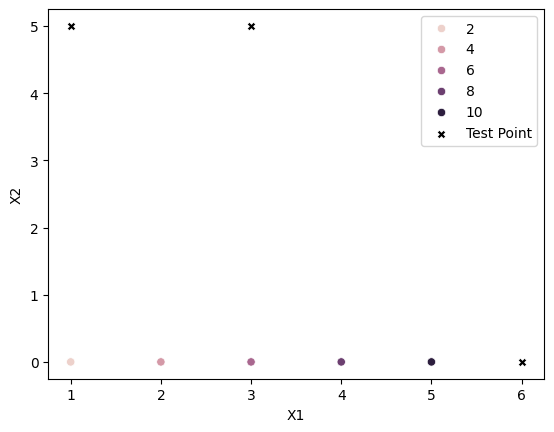

In [21]:
# Visualisation
X_train_df = pd.DataFrame(X_train, columns=["X1", "X2"])
X_train_df["label"] = y_train

sns.scatterplot(
    data = X_train_df,
    x = "X1",
    y = "X2",
    hue = "label"
)

X_test_df = pd.DataFrame(X_test, columns=["X1", "X2"])

sns.scatterplot(
    data = X_test_df,
    x = "X1",
    y = "X2",
    color ="black",
    marker = "X",
    label = "Test Point"
)

In [22]:
X_train_df

,X1,X2,label
0,1,0,2
1,2,0,4
2,3,0,6
3,4,0,8
4,5,0,10
